In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_train_data = pd.read_csv("ML_Train_Data.csv")

In [3]:
df_train_data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,Classification
0,0,1.998401e-18,0.000059,0.000066,0.000079,0.000075,0.000072,0.000059,0.000055,0.000042,...,0.000030,0.000057,0.000045,0.000025,0.000031,0.000053,0.000047,0.000033,0.000148,1
1,1,6.439294e-18,0.000047,0.000121,0.000035,0.000072,0.000091,0.000012,0.000046,0.000111,...,0.000086,0.000068,0.000091,0.000006,0.000099,0.000045,0.000034,0.000124,0.000040,1
2,2,8.437695e-18,0.000110,0.000049,0.000150,0.000069,0.000084,0.000087,0.000116,0.000141,...,0.000122,0.000091,0.000135,0.000093,0.000058,0.000051,0.000052,0.000079,0.000065,1
3,3,3.108624e-18,0.000124,0.000140,0.000061,0.000178,0.000145,0.000066,0.000086,0.000086,...,0.000022,0.000085,0.000083,0.000063,0.000081,0.000155,0.000132,0.000103,0.000001,1
4,4,1.132427e-17,0.000034,0.000047,0.000068,0.000106,0.000103,0.000071,0.000041,0.000063,...,0.000108,0.000044,0.000072,0.000077,0.000036,0.000037,0.000035,0.000116,0.000046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,492,2.886580e-18,0.000585,0.000538,0.000706,0.001131,0.000664,0.000167,0.000587,0.000506,...,0.001006,0.000357,0.000960,0.000960,0.000697,0.000626,0.000750,0.001112,0.000130,3
380,493,1.432188e-17,0.000895,0.000269,0.000881,0.000140,0.000944,0.000132,0.000914,0.001414,...,0.002000,0.001668,0.001187,0.001028,0.000331,0.000199,0.000134,0.000752,0.001982,3
381,494,8.881784e-18,0.001689,0.000365,0.000716,0.000627,0.000062,0.000638,0.000905,0.000484,...,0.001402,0.000345,0.002073,0.001431,0.001631,0.001110,0.002290,0.000148,0.000172,3
382,495,4.529710e-17,0.002816,0.001422,0.000980,0.000898,0.002116,0.000437,0.000877,0.000936,...,0.004013,0.002082,0.005844,0.004043,0.005057,0.003420,0.003110,0.003129,0.002629,3


In [4]:
split_factor = 0.9
classes = ['Stillstand', 'Waschen', 'Schleudern']
X = df_train_data.iloc[:, 1:52].values
y = df_train_data.iloc[:, 52].values
print(X)
print(y)

[[1.99840144e-18 5.88482529e-05 6.55243979e-05 ... 4.67136757e-05
  3.27361285e-05 1.47680000e-04]
 [6.43929354e-18 4.73219034e-05 1.20969384e-04 ... 3.40211072e-05
  1.24485344e-04 3.96000000e-05]
 [8.43769499e-18 1.10432027e-04 4.88822360e-05 ... 5.22140715e-05
  7.87806067e-05 6.51700000e-05]
 ...
 [8.88178420e-18 1.68907397e-03 3.65416882e-04 ... 2.29046509e-03
  1.47953007e-04 1.72420000e-04]
 [4.52970994e-17 2.81554185e-03 1.42187677e-03 ... 3.11017564e-03
  3.12893975e-03 2.62921000e-03]
 [1.59872116e-17 1.36879744e-03 1.00310515e-03 ... 2.79381249e-03
  3.16233220e-03 8.47655000e-03]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [5]:
n_samples = len(X)
data = X.reshape((n_samples, -1))
data

array([[1.99840144e-18, 5.88482529e-05, 6.55243979e-05, ...,
        4.67136757e-05, 3.27361285e-05, 1.47680000e-04],
       [6.43929354e-18, 4.73219034e-05, 1.20969384e-04, ...,
        3.40211072e-05, 1.24485344e-04, 3.96000000e-05],
       [8.43769499e-18, 1.10432027e-04, 4.88822360e-05, ...,
        5.22140715e-05, 7.87806067e-05, 6.51700000e-05],
       ...,
       [8.88178420e-18, 1.68907397e-03, 3.65416882e-04, ...,
        2.29046509e-03, 1.47953007e-04, 1.72420000e-04],
       [4.52970994e-17, 2.81554185e-03, 1.42187677e-03, ...,
        3.11017564e-03, 3.12893975e-03, 2.62921000e-03],
       [1.59872116e-17, 1.36879744e-03, 1.00310515e-03, ...,
        2.79381249e-03, 3.16233220e-03, 8.47655000e-03]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_factor, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
classifier = MLPClassifier(alpha=0.2, max_iter=5000, verbose=True, early_stopping=False)

In [8]:
classifier.fit(X_train_std,y_train)

Iteration 1, loss = 1.64851119
Iteration 2, loss = 1.46758657
Iteration 3, loss = 1.31556346
Iteration 4, loss = 1.19333385
Iteration 5, loss = 1.09908666
Iteration 6, loss = 1.02762921
Iteration 7, loss = 0.97515952
Iteration 8, loss = 0.93757088
Iteration 9, loss = 0.91071115
Iteration 10, loss = 0.89169028
Iteration 11, loss = 0.87821640
Iteration 12, loss = 0.86889321
Iteration 13, loss = 0.86228667
Iteration 14, loss = 0.85762908
Iteration 15, loss = 0.85463944
Iteration 16, loss = 0.85264394
Iteration 17, loss = 0.85113268
Iteration 18, loss = 0.84993527
Iteration 19, loss = 0.84898942
Iteration 20, loss = 0.84820197
Iteration 21, loss = 0.84749085
Iteration 22, loss = 0.84675244
Iteration 23, loss = 0.84592901
Iteration 24, loss = 0.84496382
Iteration 25, loss = 0.84382025
Iteration 26, loss = 0.84253310
Iteration 27, loss = 0.84107444
Iteration 28, loss = 0.83953912
Iteration 29, loss = 0.83785292
Iteration 30, loss = 0.83603338
Iteration 31, loss = 0.83409599
Iteration 32, los

MLPClassifier(alpha=0.2, max_iter=5000, verbose=True)

In [9]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test_std)
probabilities = classifier.predict_proba(X_test_std)

Classification report for classifier MLPClassifier(alpha=0.2, max_iter=5000, verbose=True):
              precision    recall  f1-score   support

           1       0.50      0.45      0.47       115
           2       0.52      0.66      0.59       116
           3       1.00      0.83      0.90       115

    accuracy                           0.65       346
   macro avg       0.67      0.65      0.66       346
weighted avg       0.67      0.65      0.65       346




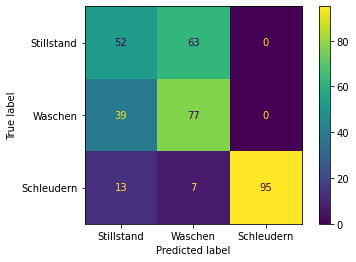

In [10]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
cm = confusion_matrix(y_test, predicted, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)

disp.plot()
plt.show()